# **Setup**

* https://www.kaggle.com/datasets/danielbacioiu/tig-aluminium-5083
* https://www.kaggle.com/code/mayankgupta1609/model-1

In [9]:
import pandas as pd 
import numpy as np 
from IPython.display import clear_output

import os
import shutil
import pickle

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Image Processing
import PIL

# Machine Learning 
import tensorflow as tf
import keras

In [10]:
# Folder_Input = "C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding"
Folder_Input = 'Input Data'
Folder_Output = 'Output Data'

Folder_List = [Folder_Input, Folder_Output]

# Create Folders
for folder in Folder_List:
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)
        print(f'Created {folder}')

In [11]:
Folder_Main = os.getcwd()
print(Folder_Main)

c:\Users\aksha\OneDrive\06 Data Science & Analytics\Github\Machine-Vision\010 Aluminium 5083 Welding Defects


# **Data Import**

## **Download Data**

In [ ]:
# from google.colab import userdata

# os.environ["KAGGLE_KEY"] = userdata.get('kaggle_key')
# os.environ["KAGGLE_USERNAME"] = userdata.get('kaggle_username')

In [ ]:
''' 
NOTE: 
TODO: 
BUG 
FIXME
REVIEW 
REFACTOR 
RECONSIDER and RE-EVALUATE
RE-DESIGN
RE-ARCHITECT
RE-IMPLEMENT
RE-FACTOR
'''

In [12]:
os.chdir(Folder_Input)
!kaggle datasets download -d danielbacioiu/tig-aluminium-5083 --quiet

os.chdir(Folder_Main)

In [13]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Machine-Vision\\010 Aluminium 5083 Welding Defects'

In [14]:
os.listdir(Folder_Input)

['README', 'test', 'tig-aluminium-5083.zip', 'train']

## **Extract File**

In [15]:
def Extract_Zip(Zip_Filepath, Destination_Path,remove_zip=False):
    from zipfile import ZipFile
    with ZipFile(Zip_Filepath, 'r') as zip:
        print(zip.namelist())
        zip.extractall(Destination_Path)
        zip.close()
    if remove_zip:
            os.remove(Zip_Filepath)

In [16]:
os.listdir(Folder_Input)

['README', 'test', 'tig-aluminium-5083.zip', 'train']

In [17]:
Extract_Zip(Zip_Filepath=f'{Folder_Input}/tig-aluminium-5083.zip',
            Destination_Path=f'{Folder_Input}',remove_zip=False)

['al5083/README', 'al5083/al5083/README', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00322.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00323.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00324.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00325.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00326.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00327.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00328.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00329.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00330.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00331.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00332.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00333.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00334.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00335.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/f

In [ ]:
Folder_Train = f'{Folder_Input}/train'
Folder_Test = f'{Folder_Input}/test'

## **Move Contents**

In [18]:
def move_folder_contents(source_folder, destination_folder):
    try:
        # Ensure the destination folder exists
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Get a list of files and subdirectories in the source folder
        contents = os.listdir(source_folder)

        # Move each item to the destination folder
        for item in contents:
            source_path = os.path.join(source_folder, item)
            destination_path = os.path.join(destination_folder, item)
            # if os.path.isdir(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved {item} to {destination_folder}")
            print("Contents moved successfully!")
        
    except Exception as e:
        print(f"Error moving contents: {e}")

In [19]:
move_folder_contents(f'{Folder_Input}\\al5083\\al5083', f'{Folder_Input}')

Moved README to C:\Data Analytics Workspace\Datasets\01 Aluminium TIG Welding
Contents moved successfully!
Moved test to C:\Data Analytics Workspace\Datasets\01 Aluminium TIG Welding
Contents moved successfully!
Moved train to C:\Data Analytics Workspace\Datasets\01 Aluminium TIG Welding
Contents moved successfully!


In [20]:
shutil.rmtree(f'{Folder_Input}/al5083')

## **Read Train Data**

In [21]:
# Read JSON File & Convert To Dataframe
df_train = pd.read_json(f'{Folder_Train}/train.json',orient='index').reset_index()
df_train.columns=['filepath','defect']

print(df_train.shape)
df_train.head()

(26666, 2)


filepath  defect
0  170906-113317-Al 2mm-part3/frame_00647.png       1
1  170906-113317-Al 2mm-part3/frame_00672.png       1
2  170906-113317-Al 2mm-part3/frame_00677.png       1
3  170906-113317-Al 2mm-part3/frame_00646.png       1
4  170906-113317-Al 2mm-part3/frame_00691.png       1

## **Read Test Data**

In [22]:
# Read JSON File & Convert To Dataframe
df_test = pd.read_json(f'{Folder_Test}/test.json',orient='index').reset_index()
df_test.columns=['filepath','defect']

print(df_test.shape)
df_test.head()

(6588, 2)


filepath  defect
0  170906-143512-Al 2mm-part2/frame_01945.png       1
1  170906-143512-Al 2mm-part2/frame_01888.png       1
2  170906-143512-Al 2mm-part2/frame_01759.png       1
3  170906-143512-Al 2mm-part2/frame_01947.png       1
4  170906-143512-Al 2mm-part2/frame_01749.png       1

## **Decode Defect Codes**

* 0 = good weld
* 1 = burn through
* 2 = contamination
* 3 = lack of fusion
* 4 = misalignment     
* 5 = lack of penetration

In [23]:
defect_labels = {0:'good weld',1:'burn through',2:'contamination',3:'lack of fusion',4:'misalignment',5:'lack of penetration'}
print(defect_labels)

{0: 'good weld', 1: 'burn through', 2: 'contamination', 3: 'lack of fusion', 4: 'misalignment', 5: 'lack of penetration'}


In [24]:
df_train['defect_label'] = df_train['defect'].apply(lambda x: defect_labels[x])
df_train.head()

filepath  defect  defect_label
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through

In [25]:
df_test['defect_label'] = df_test['defect'].apply(lambda x: defect_labels[x])
df_test.head()

filepath  defect  defect_label
0  170906-143512-Al 2mm-part2/frame_01945.png       1  burn through
1  170906-143512-Al 2mm-part2/frame_01888.png       1  burn through
2  170906-143512-Al 2mm-part2/frame_01759.png       1  burn through
3  170906-143512-Al 2mm-part2/frame_01947.png       1  burn through
4  170906-143512-Al 2mm-part2/frame_01749.png       1  burn through

# **Data Validation**

## **Missing Values**

In [26]:
df_train.isna().sum()   

filepath        0
defect          0
defect_label    0
dtype: int64

In [27]:
df_test.isna().sum()   

filepath        0
defect          0
defect_label    0
dtype: int64

## **Duplicate Values**

In [28]:
df_train.duplicated().sum()

0

In [29]:
df_test.duplicated().sum()

0

# **Data Exploration**

## **Defect Count**

In [30]:
df_train['defect_label'].value_counts(normalize=True,sort=True)

defect_label
good weld              0.328433
contamination          0.237193
lack of fusion         0.151054
misalignment           0.110740
lack of penetration    0.105715
burn through           0.066864
Name: proportion, dtype: float64

In [31]:
df_test['defect_label'].value_counts(normalize=True,sort=True)

defect_label
good weld              0.332271
contamination          0.315422
lack of fusion         0.152854
misalignment           0.110656
burn through           0.053279
lack of penetration    0.035519
Name: proportion, dtype: float64

## **View Training Images**

filepath  defect         defect_label
0  170906-141809-Al 2mm-part2/frame_01420.png       2        contamination
1  170904-154202-Al 2mm-part2/frame_01623.png       4         misalignment
2        170906-144958-Al 2mm/frame_01783.png       1         burn through
3        170906-114912-Al 2mm/frame_00570.png       0            good weld
4        170906-120346-Al 2mm/frame_00235.png       0            good weld
5        170904-115503-Al 2mm/frame_00728.png       5  lack of penetration
6  170906-141809-Al 2mm-part1/frame_01073.png       0            good weld
7  170905-110711-Al 2mm-part1/frame_00280.png       5  lack of penetration
8  170904-141232-Al 2mm-part1/frame_00478.png       5  lack of penetration
9        170904-155523-Al 2mm/frame_01351.png       4         misalignment

(974, 800)
(974, 800)
(974, 800)
(974, 800)
(974, 800)
(974, 800)


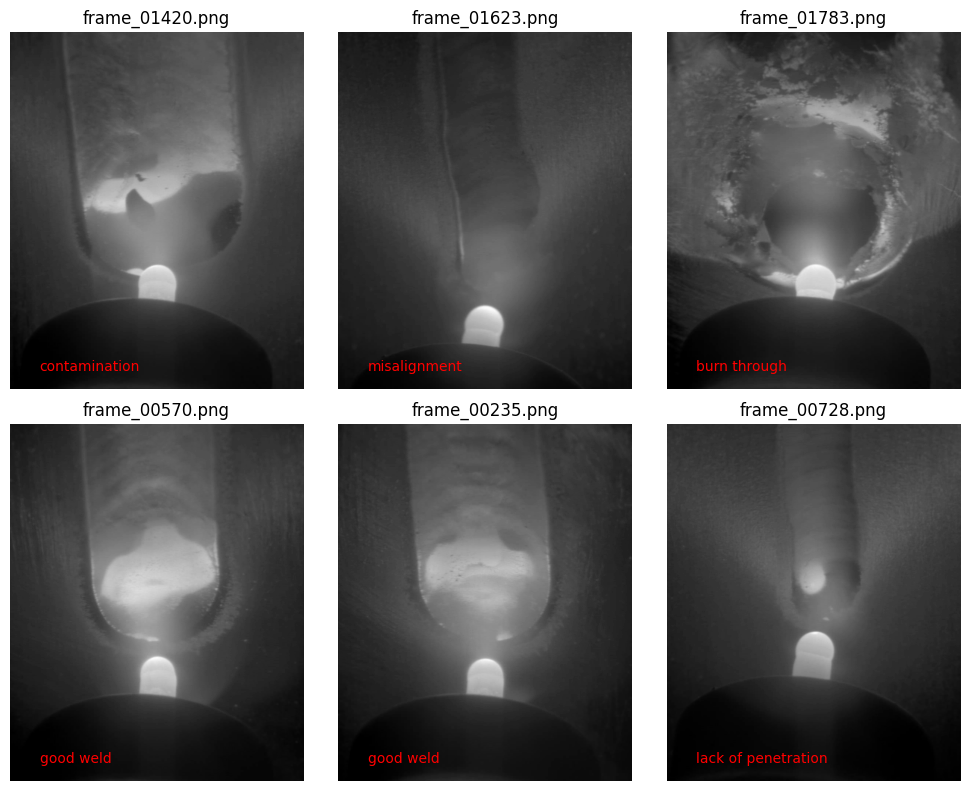

In [32]:
df_train_sample =df_train.sample(10,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 
    print(file_shape)

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 00 Good**

* Good Weld

filepath  defect defect_label
0  170904-145718-Al 2mm-part1/frame_00335.png       0    good weld
1        170913-142501-Al 2mm/frame_01098.png       0    good weld
2  170913-143933-Al 2mm-part1/frame_00760.png       0    good weld
3        170905-115602-Al 2mm/frame_00416.png       0    good weld
4  170913-152931-Al 2mm-part1/frame_00648.png       0    good weld
5        170906-120346-Al 2mm/frame_01259.png       0    good weld

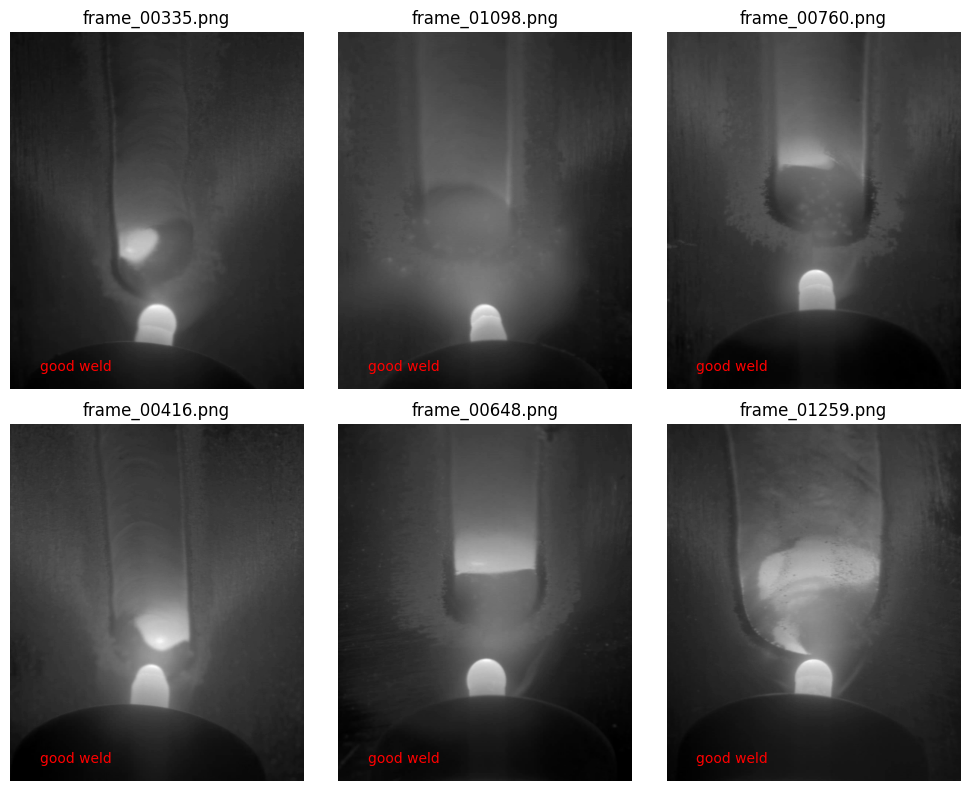

In [33]:
df_train_sample =df_train[df_train['defect']==0].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 01 Burn Through**

* Burn Through Defect

filepath  defect  defect_label
0  170906-144958-Al 2mm/frame_01847.png       1  burn through
1  170906-144958-Al 2mm/frame_01294.png       1  burn through
2  170906-144958-Al 2mm/frame_01477.png       1  burn through
3  170906-144958-Al 2mm/frame_01077.png       1  burn through
4  170906-144958-Al 2mm/frame_00652.png       1  burn through
5  170906-144958-Al 2mm/frame_01336.png       1  burn through

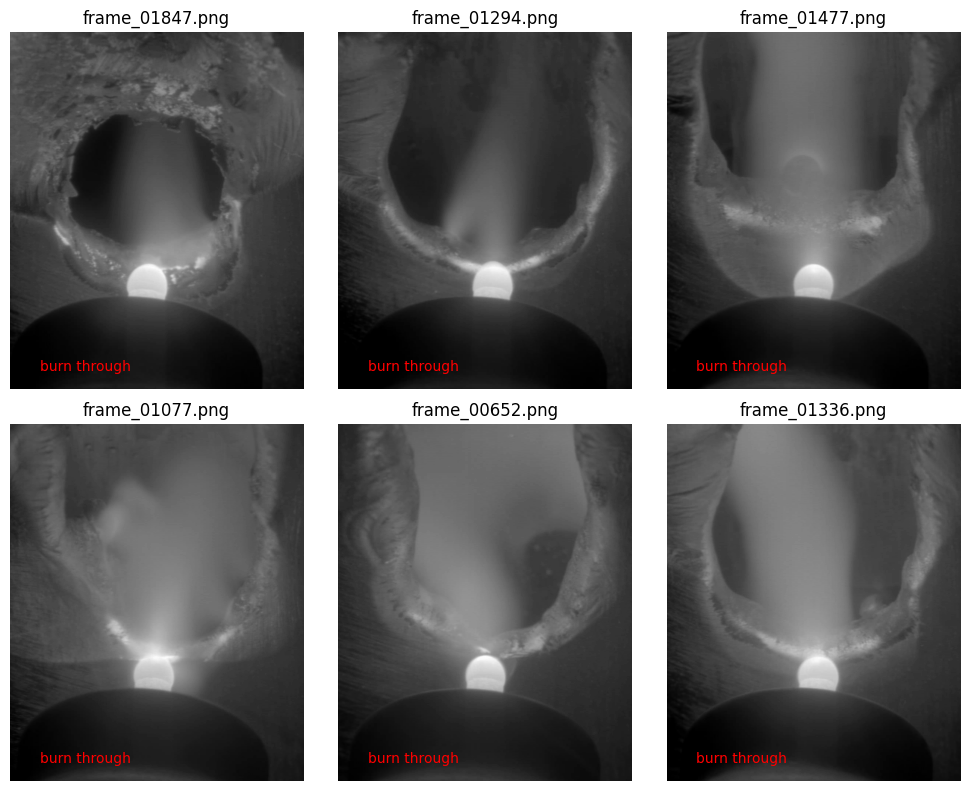

In [34]:
df_train_sample =df_train[df_train['defect']==1].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 02 Contamination**

* Weld Contamination

filepath  defect   defect_label
0  170815-133921-Al 2mm/frame_00852.png       2  contamination
1  170904-112347-Al 2mm/frame_02090.png       2  contamination
2  170904-112347-Al 2mm/frame_01374.png       2  contamination
3  170904-112347-Al 2mm/frame_01549.png       2  contamination
4  170904-112347-Al 2mm/frame_01478.png       2  contamination
5  170904-112347-Al 2mm/frame_00722.png       2  contamination

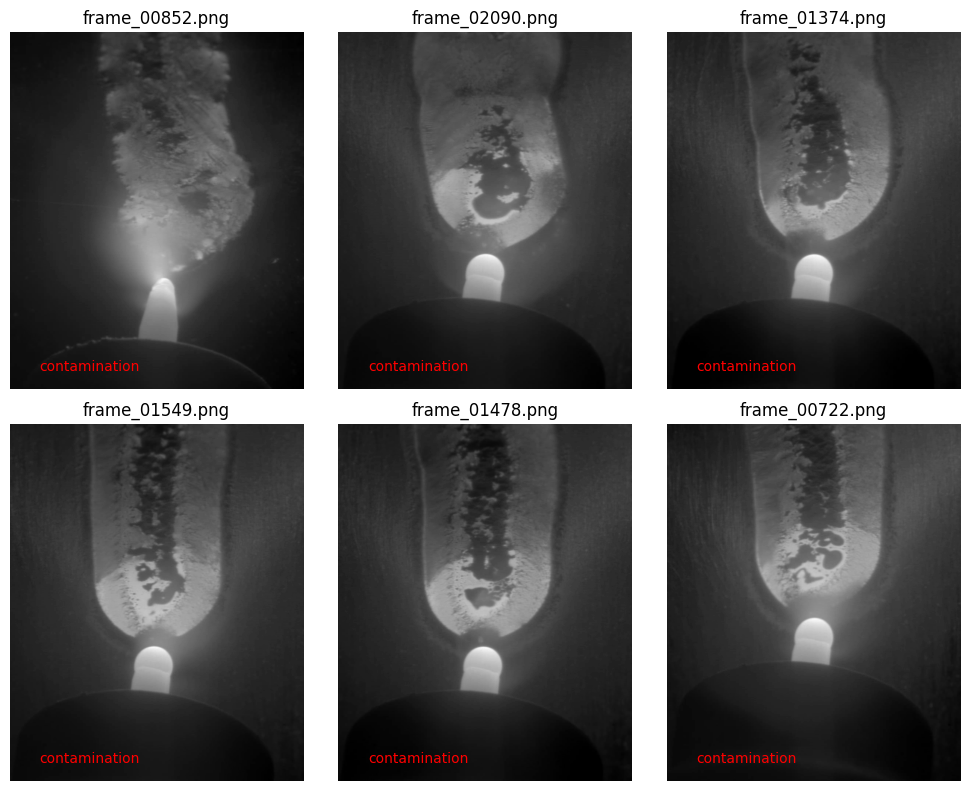

In [35]:
df_train_sample =df_train[df_train['defect']==2].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 03 Lack Of Fusion**

* Lack Of Fusion

filepath  defect    defect_label
0  170906-150010-Al 2mm/frame_00735.png       3  lack of fusion
1  170906-151353-Al 2mm/frame_01065.png       3  lack of fusion
2  170906-150801-Al 2mm/frame_00617.png       3  lack of fusion
3  170906-150801-Al 2mm/frame_00094.png       3  lack of fusion
4  170906-151353-Al 2mm/frame_00122.png       3  lack of fusion
5  170906-151353-Al 2mm/frame_01248.png       3  lack of fusion

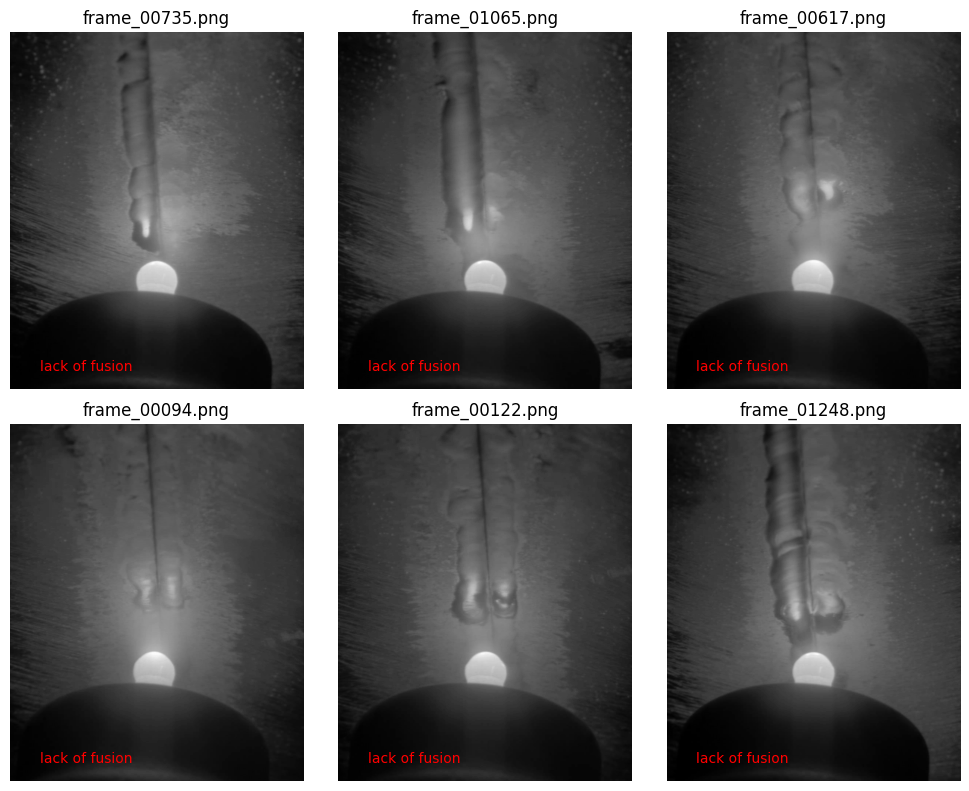

In [36]:
df_train_sample =df_train[df_train['defect']==3].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 04 Misalignment**

* Weld Misalignment

filepath  defect  defect_label
0  170905-110711-Al 2mm-part2/frame_00536.png       4  misalignment
1  170913-155806-Al 2mm-part2/frame_01485.png       4  misalignment
2  170904-152301-Al 2mm-part1/frame_00290.png       4  misalignment
3        170904-155523-Al 2mm/frame_01379.png       4  misalignment
4  170904-145718-Al 2mm-part2/frame_00660.png       4  misalignment
5  170904-154202-Al 2mm-part2/frame_01452.png       4  misalignment

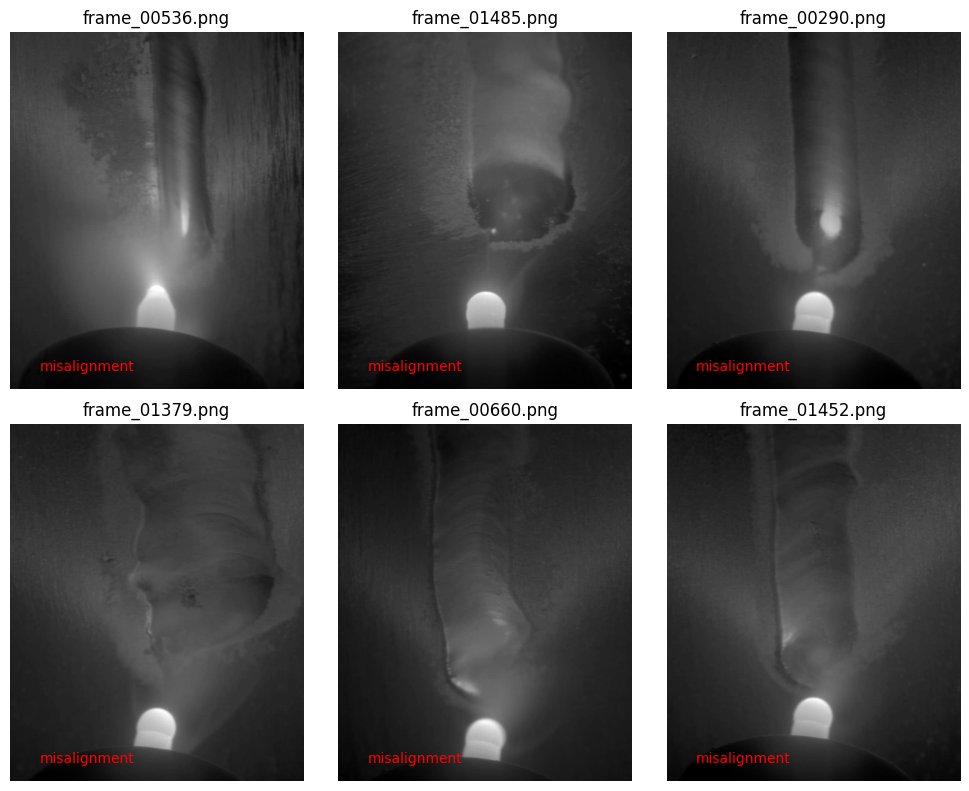

In [37]:
df_train_sample =df_train[df_train['defect']==4].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 05 Lack Of Penetration**

* Lack Of Penetration

filepath  defect         defect_label
0  170906-153326-Al 2mm-part1/frame_00360.png       5  lack of penetration
1  170904-141232-Al 2mm-part1/frame_00294.png       5  lack of penetration
2  170906-153326-Al 2mm-part1/frame_00443.png       5  lack of penetration
3  170904-151845-Al 2mm-part1/frame_00685.png       5  lack of penetration
4  170906-153326-Al 2mm-part1/frame_00229.png       5  lack of penetration
5  170906-153326-Al 2mm-part1/frame_00431.png       5  lack of penetration

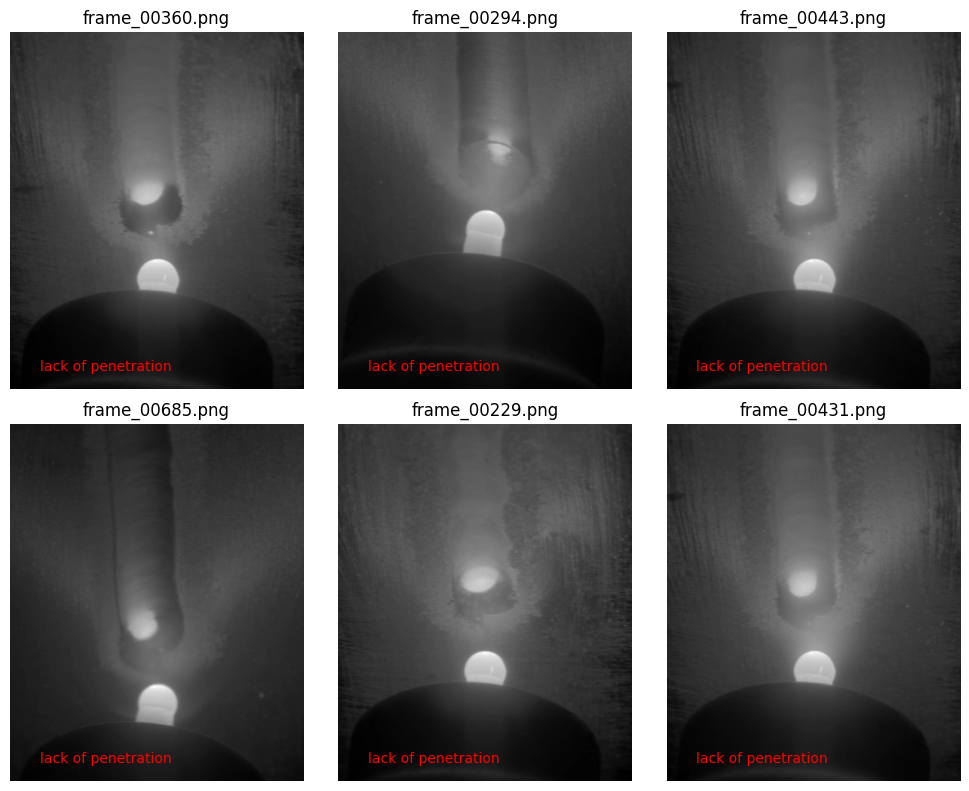

In [38]:
df_train_sample =df_train[df_train['defect']==5].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Data Processing**

In [39]:
df_train.head()

filepath  defect  defect_label
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through

## **Add Actual Filepath**

In [40]:
df_train['Image_Path'] = df_train['filepath'].apply(lambda x: os.path.join(Folder_Train,x))

df_train.head()

filepath  defect  defect_label  \
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through   
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through   
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through   
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through   
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through   

                                          Image_Path  
0  C:\Data Analytics Workspace\Datasets\01 Alumin...  
1  C:\Data Analytics Workspace\Datasets\01 Alumin...  
2  C:\Data Analytics Workspace\Datasets\01 Alumin...  
3  C:\Data Analytics Workspace\Datasets\01 Alumin...  
4  C:\Data Analytics Workspace\Datasets\01 Alumin...

## **Create Dataset**

In [41]:
from tensorflow.keras.utils import to_categorical, plot_model,img_to_array
from keras.preprocessing.image import load_img, img_to_array

In [42]:
# def load_and_preprocess_image(path):
#     img = load_img(path, target_size=(150, 150))
#     img_array = img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)  # Create a batch
#     return img_array / 255.0  # Normalize to [0,1] range

def load_and_preprocess_image(path):
    # Read the image file
    img = tf.io.read_file(path)
    # Decode the image file to a tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # Resize the image
    img = tf.image.resize(img, [974, 800])
    # Normalize the pixel values to the [0,1] range.
    return img / 255.0

def create_dataset(image_paths, labels, batch_size):
    # Convert the image paths and labels to a Dataset.
    path_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    # Use map to load and preprocess each image in parallel.
    image_label_ds = path_ds.map(lambda x, y: (load_and_preprocess_image(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # Batch the data for multiple steps
    image_label_ds = image_label_ds.batch(batch_size)
    # Use buffered prefecting on all datasets
    return image_label_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# list of image file paths
image_file_paths = list(df_train['Image_Path'].values)
labels = list(df_train['defect'].values)

# Create a dataset
dataset = create_dataset(image_file_paths, labels,batch_size=32)
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 974, 800, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
dataset.element_spec

(TensorSpec(shape=(None, 974, 800, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

Images shape:  (32, 974, 800, 1)
Labels:  tf.Tensor(1, shape=(), dtype=int32)


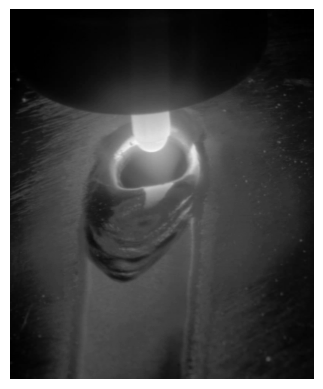

In [44]:
for images, labels in dataset.take(1):
    print("Images shape: ", images.shape)
    print("Labels: ", labels[0])
    plt.imshow(images[0], cmap='gray')
    plt.axis('off')
    plt.show()

## **Split Dataset**

In [45]:
# Determine the number of total images
total_size = len(image_file_paths)

# Determine the number of images for training (let's say 80% for training)
train_size = int(0.8 * total_size)

# Split the dataset into training and validation datasets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# **Distribution Strategy**

In [46]:
import json

# On worker 0
os.environ['TF_CONFIG'] = json.dumps({
    'cluster': {
        'worker': ["localhost:12345", "127.0.0.1:8888"]
    },
    'task': {'type': 'worker', 'index': 0}
})

# # On worker 1
# os.environ['TF_CONFIG'] = json.dumps({
#     'cluster': {
#         'worker': ["localhost:12345", "localhost:23456"]
#     },
#     'task': {'type': 'worker', 'index': 1}
# })

In [48]:
os.getenv('TF_CONFIG')

'{"cluster": {"worker": ["localhost:12345", "127.0.0.1:8888"]}, "task": {"type": "worker", "index": 0}}'

# **Model Development**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation,Normalization,BatchNormalization, \
                                    Conv2D,MaxPooling2D,Flatten,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## **Create Model**

In [49]:
# Define the strategy
strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()

with strategy.scope():
    # Create Model
    Model01 = Sequential()

    Model01.add(InputLayer(input_shape = (974,800,1)))
    Model01.add(Conv2D(filters=32, kernel_size=(3,3),activation ='relu', padding ='same'))
    Model01.add(MaxPooling2D(pool_size=(2,2)))

    Model01.add(Flatten())
    Model01.add(Dense(units=64, activation ='relu'))
    Model01.add(Dense(6, activation ='softmax'))
    # Model01.summary()

    # Callbacks
    Model01_ES = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
    Model01_CP = ModelCheckpoint('Model0101.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # Compile The Model01
    Model01.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    Model01.fit(x=train_dataset,batch_size=32,epochs=5,validation_data=val_dataset,
                callbacks=[Model01_ES,Model01_CP])

Instructions for updating:
use distribute.MultiWorkerMirroredStrategy instead


RuntimeError: Collective ops must be configured at program startup